In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
def list_files_in_folder(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file)
    return file_list

# Replace 'folder_path' with the actual path of the folder you want to read
folder_path = '/train'
files_in_folder = list_files_in_folder(folder_path)

# Now 'files_in_folder' contains a list of paths to all the files in the folder
print(files_in_folder[:3])


[]


In [3]:
def file_list(folder_path):
    file = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        file.append(file_path)
    return file


In [4]:
folder_path = 'train'
train = file_list(folder_path)
folder_path = 'valid'
val = file_list(folder_path)

In [5]:
train_anno=pd.read_json('train_annotations')
train_anno

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[119, 25, 205, 606]",124230,[],0
1,1,1,1,"[131, 82, 327, 440]",143880,[],0
2,2,2,2,"[225, 298, 198, 185]",36630,[],0
3,3,3,2,"[468, 109, 172, 193]",33196,[],0
4,4,4,1,"[14, 242, 611, 154]",94094,[],0
...,...,...,...,...,...,...,...
495,495,495,2,"[92, 203, 456, 230]",104880,[],0
496,496,496,1,"[229, 359, 144, 131]",18864,[],0
497,497,497,1,"[258, 183, 126, 323]",40698,[],0
498,498,498,1,"[140, 55, 336, 517]",173712,[],0


In [6]:
val_anno=pd.read_json('valid_annotations')
val_anno

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[227, 93, 298, 525]",156450,[],0
1,1,1,2,"[211, 198, 428, 259]",110852,[],0
2,2,2,2,"[0, 243, 512, 267]",136704,[],0
3,3,3,1,"[128, 178, 457, 354]",161778,[],0
4,4,4,1,"[168, 131, 296, 469]",138824,[],0
...,...,...,...,...,...,...,...
67,67,67,2,"[198, 288, 273, 135]",36855,[],0
68,68,68,1,"[58, 225, 205, 283]",58015,[],0
69,69,69,1,"[162, 109, 351, 327]",114777,[],0
70,70,70,2,"[23, 87, 539, 454]",244706,[],0


In [7]:
train_anno.drop(['id', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)
val_anno.drop(['id', 'area', 'segmentation', 'iscrowd'], axis =1, inplace=True)


In [8]:
train_anno.columns=['filepaths', 'labels', 'bbox']
val_anno.columns=['filepaths', 'labels', 'bbox']

In [9]:
train_anno

,filepaths,labels,bbox
0,0,1,"[119, 25, 205, 606]"
1,1,1,"[131, 82, 327, 440]"
2,2,2,"[225, 298, 198, 185]"
3,3,2,"[468, 109, 172, 193]"
4,4,1,"[14, 242, 611, 154]"
...,...,...,...
495,495,2,"[92, 203, 456, 230]"
496,496,1,"[229, 359, 144, 131]"
497,497,1,"[258, 183, 126, 323]"
498,498,1,"[140, 55, 336, 517]"


In [10]:
val_anno

,filepaths,labels,bbox
0,0,1,"[227, 93, 298, 525]"
1,1,2,"[211, 198, 428, 259]"
2,2,2,"[0, 243, 512, 267]"
3,3,1,"[128, 178, 457, 354]"
4,4,1,"[168, 131, 296, 469]"
...,...,...,...
67,67,2,"[198, 288, 273, 135]"
68,68,1,"[58, 225, 205, 283]"
69,69,1,"[162, 109, 351, 327]"
70,70,2,"[23, 87, 539, 454]"


In [11]:
import cv2

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


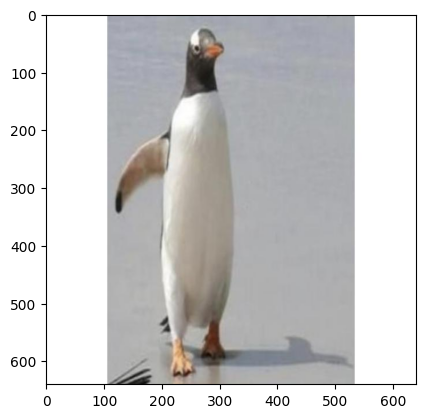

In [12]:
# now in the filepaths column create the full path to the image file
train_image_dir=r'train'
train_imglist=sorted(os.listdir(train_image_dir))
train_paths=[]
for i in range (len(train_imglist)):
    train_path = os.path.join(train_image_dir, train_imglist[i])
    image = cv2.imread(train_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    train_paths.append(image)
print (train_paths[0])
plt.imshow(train_paths[0])

[[[143 153 178]
  [143 153 178]
  [143 153 178]
  ...
  [163 175 201]
  [163 175 201]
  [163 175 201]]

 [[143 153 178]
  [143 153 178]
  [143 153 178]
  ...
  [163 175 201]
  [163 175 201]
  [163 175 201]]

 [[143 153 178]
  [143 153 178]
  [143 153 178]
  ...
  [163 175 201]
  [163 175 201]
  [163 175 201]]

 ...

 [[149 157 180]
  [154 162 183]
  [161 169 190]
  ...
  [165 172 191]
  [165 172 191]
  [165 172 191]]

 [[130 137 166]
  [134 141 169]
  [139 146 174]
  ...
  [156 161 183]
  [157 162 182]
  [157 162 182]]

 [[141 147 179]
  [139 145 177]
  [134 141 170]
  ...
  [148 153 175]
  [151 156 176]
  [154 159 179]]]


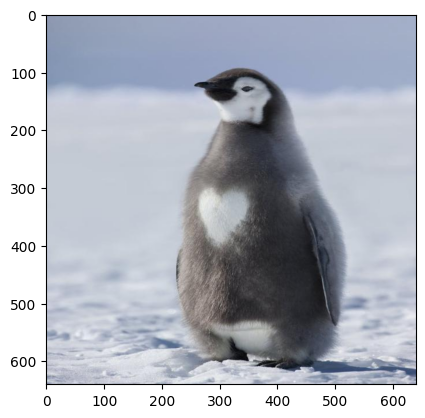

In [13]:
# now in the filepaths column create the full path to the image file
val_image_dir=r'valid'
val_imglist=sorted(os.listdir(val_image_dir))
val_paths=[]
for i in range (len(val_imglist)):
    val_path = os.path.join(val_image_dir, val_imglist[i])  
    image = cv2.imread(val_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    val_paths.append(image)
print (val_paths[0])
plt.imshow(val_paths[0])

In [14]:
# now in the train_anno filepaths column insert the full filepath
train_anno['filepaths']=train_paths
train_anno


,filepaths,labels,bbox
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[119, 25, 205, 606]"
1,"[[[91, 91, 91], [91, 91, 91], [91, 91, 91], [9...",1,"[131, 82, 327, 440]"
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[225, 298, 198, 185]"
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[468, 109, 172, 193]"
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[14, 242, 611, 154]"
...,...,...,...
495,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[92, 203, 456, 230]"
496,"[[[95, 103, 122], [95, 103, 122], [96, 104, 12...",1,"[229, 359, 144, 131]"
497,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[258, 183, 126, 323]"
498,"[[[254, 255, 255], [254, 255, 255], [254, 255,...",1,"[140, 55, 336, 517]"


In [15]:
# now in the train_anno filepaths column insert the full filepath
val_anno['filepaths']=val_paths
val_df = val_anno
val_df

,filepaths,labels,bbox
0,"[[[143, 153, 178], [143, 153, 178], [143, 153,...",1,"[227, 93, 298, 525]"
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[211, 198, 428, 259]"
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[0, 243, 512, 267]"
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[128, 178, 457, 354]"
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[168, 131, 296, 469]"
...,...,...,...
67,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[198, 288, 273, 135]"
68,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1,"[58, 225, 205, 283]"
69,"[[[254, 255, 250], [254, 255, 250], [254, 255,...",1,"[162, 109, 351, 327]"
70,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2,"[23, 87, 539, 454]"


In [18]:
for i in train_anno.index:
    bbox = train_anno['bbox'][i]
    image = train_anno['filepaths'][i]
    x1,y1,x2,y2 = bbox
    if x1>x2 or y1>y2:
        bbox[2] = x1+x2
        bbox[3] = y1+y2

In [17]:
count = 0
for i in train_anno.index:
    if count == 1:
        print(train_anno['bbox'][i])
    count +=1

[131, 82, 327, 440]


In [ ]:
def sliding_window(image, step, window_size):
    # slide a window across the image
    for y in range(0, image.shape[0], step):
        for x in range(0, image.shape[1], step):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def evaluate_window(window):
    return np.mean(window)

def evaluate_edges(window):
    edges = cv2.Canny(window, 50, 150)
    return np.sum(edges > 0)

def evaluate_color_histogram(window):
    hist = cv2.calcHist([window], [0], None, [256], [0, 256])
    return np.mean(hist)


def detect_subject(image_path, min_window_size=(30, 30), max_window_size=(200, 200), window_step=20, slide_step=10):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # 阈值处理，将非白色（假设大于200）部分设为0
    _, thresholded = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

    # 找到阈值化后的最大外接矩形
    xo, yo, w, h = cv2.boundingRect(thresholded)

    # 裁剪图片
    cropped_image = image[yo:yo+h, xo:xo+w]
    w,h = image.shape
    max_window_size = (w,h)
    min_window_size = (w//3,h//3)
    window_step = min(w,h)//15

    # 使用Canny边缘检测
    edges = cv2.Canny(cropped_image, 50, 150)

    if image is None:
        print("Image not found.")
        return

    max_score = -1
    best_window = (0, 0)

    for width in range(min_window_size[0], max_window_size[0] + 1, window_step):
        for height in range(min_window_size[1], max_window_size[1] + 1, window_step):
            current_window_size = (width, height)
            
            for (x, y, window) in sliding_window(edges, slide_step, current_window_size):
                if window.shape[0] != current_window_size[1] or window.shape[1] != current_window_size[0]:
                    continue
                
                score = evaluate_window(window) + evaluate_edges(window)
                if score > max_score:
                    max_score = score
                    best_window = (x, y, width, height)

    # Draw the best window on the image
    #image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    #cv2.rectangle(cropped_image, (best_window[0], best_window[1]), (best_window[0] + best_window[2], best_window[1] + best_window[3]), (255, 0, 0), 2)
    # 转换裁剪后的图像坐标到原图坐标
    x_win, y_win, width, height = best_window
    x_orig = x_win + xo
    y_orig = y_win + yo
    x1_orig = x_orig + width
    y1_orig = y_orig + height

    # 将坐标存储为列表
    bbox = [x_orig, y_orig, x1_orig, y1_orig]

    c_image = image[y_orig:y1_orig, x_orig:x1_orig]

    return [c_image,bbox]
